# **Implementasi Filter Kalman untuk Estimasi Posisi Robot**

Filter Kalman digunakan untuk memperkirakan posisi dan kecepatan robot berdasarkan pengukuran sensor dan model gerakan.

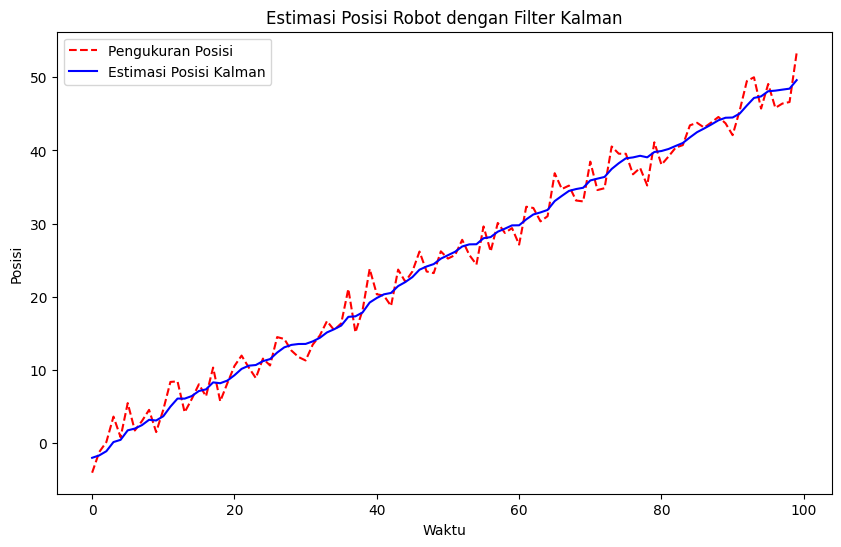

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menginisialisasi Filter Kalman
def kalman_filter(z, x_est_prev, P_prev, A, H, Q, R):
    # Prediksi langkah
    x_pred = A @ x_est_prev
    P_pred = A @ P_prev @ A.T + Q

    # Kalman gain
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)

    # Koreksi langkah
    x_est = x_pred + K @ (z - H @ x_pred)
    P_est = (np.eye(len(P_pred)) - K @ H) @ P_pred

    return x_est, P_est

# Inisialisasi variabel
dt = 0.1  # Interval waktu
A = np.array([[1, dt], [0, 1]])  # Model gerakan (posisi, kecepatan)
H = np.array([[1, 0]])  # Pengukuran posisi (mengukur hanya posisi)
Q = np.array([[0.01, 0], [0, 0.01]])  # Noise model gerakan
R = np.array([[1]])  # Noise pengukuran
x_est = np.array([[0], [1]])  # Posisi awal dan kecepatan (0 posisi, 1 kecepatan)
P = np.array([[1, 0], [0, 1]])  # Pencarian ketidakpastian awal

# Simulasi pengukuran dan estimasi posisi
num_steps = 100
z = np.linspace(0, 50, num_steps) + np.random.normal(0, 2, num_steps)  # Pengukuran posisi dengan noise
positions = []

for i in range(num_steps):
    x_est, P = kalman_filter(z[i], x_est, P, A, H, Q, R)
    positions.append(x_est[0, 0])

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(z, label="Pengukuran Posisi", color="r", linestyle="--")
plt.plot(positions, label="Estimasi Posisi Kalman", color="b")
plt.xlabel('Waktu')
plt.ylabel('Posisi')
plt.title('Estimasi Posisi Robot dengan Filter Kalman')
plt.legend()
plt.show()


# **Implementasi Filter Partikel untuk Estimasi Posisi Robot**

Filter Partikel menggunakan sekumpulan partikel untuk memodelkan kemungkinan posisi robot berdasarkan pengukuran sensor.

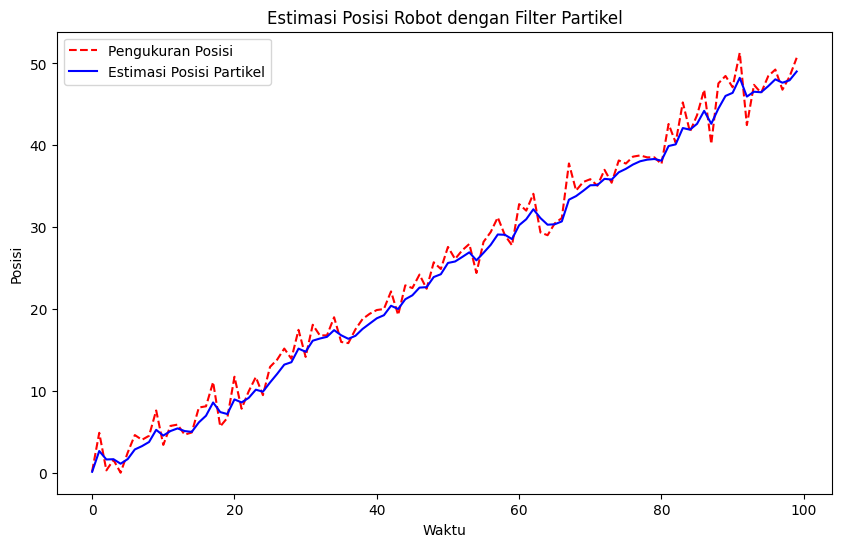

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk Filter Partikel
def particle_filter(z, particles, weights, motion_noise, sensor_noise):
    # Prediksi langkah (gerakan robot)
    particles += np.random.normal(0, motion_noise, size=particles.shape)

    # Update bobot berdasarkan pengukuran
    distances = np.abs(particles - z)
    weights = np.exp(-distances**2 / (2 * sensor_noise**2))
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling partikel
    indices = np.random.choice(range(len(particles)), size=len(particles), p=weights)
    particles = particles[indices]

    return particles, weights

# Inisialisasi variabel
num_particles = 1000
particles = np.random.uniform(-10, 10, num_particles)  # Posisi partikel acak
weights = np.ones(num_particles) / num_particles  # Bobot awal
motion_noise = 1.0  # Noise gerakan
sensor_noise = 2.0  # Noise sensor

# Simulasi pengukuran dan estimasi posisi
num_steps = 100
z = np.linspace(0, 50, num_steps) + np.random.normal(0, 2, num_steps)  # Pengukuran posisi dengan noise
estimated_positions = []

for i in range(num_steps):
    particles, weights = particle_filter(z[i], particles, weights, motion_noise, sensor_noise)
    estimated_positions.append(np.mean(particles))

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(z, label="Pengukuran Posisi", color="r", linestyle="--")
plt.plot(estimated_positions, label="Estimasi Posisi Partikel", color="b")
plt.xlabel('Waktu')
plt.ylabel('Posisi')
plt.title('Estimasi Posisi Robot dengan Filter Partikel')
plt.legend()
plt.show()


# **Implementasi Localization dengan Sensor IMU dan Lidar**

Untuk localization, kita menggunakan sensor IMU (Inertial Measurement Unit) dan Lidar. IMU memberikan data akselerasi dan sudut, sementara Lidar memberikan data jarak.

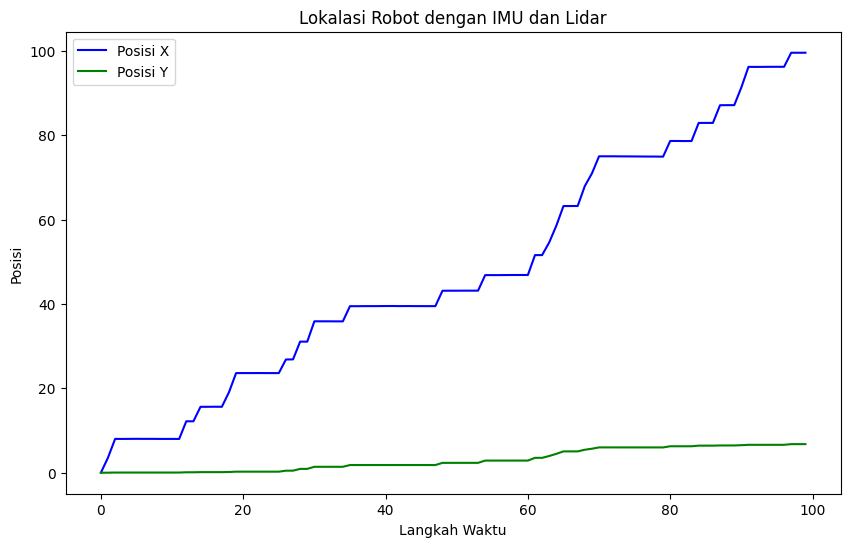

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk model gerakan robot dengan IMU dan Lidar
def localization_with_sensors(imu_data, lidar_data, initial_pos, dt):
    x, y, theta = initial_pos  # Posisi awal (x, y, sudut)
    positions = []  # Menyimpan posisi robot sepanjang waktu

    for i in range(len(imu_data)):
        # IMU (Perkiraan gerakan berdasarkan kecepatan dan sudut)
        accel = imu_data[i][0]
        gyro = imu_data[i][1]

        # Pembaruan posisi menggunakan data IMU
        theta += gyro * dt
        x += accel * np.cos(theta) * dt
        y += accel * np.sin(theta) * dt

        # Lidar (Pengukuran jarak untuk koreksi)
        lidar_dist = lidar_data[i]
        if lidar_dist < 5:  # Jika Lidar mendeteksi objek dekat
            x += lidar_dist * np.cos(theta)
            y += lidar_dist * np.sin(theta)

        positions.append([x, y])  # Menyimpan posisi setiap langkah

    return np.array(positions)

# Simulasi data IMU dan Lidar
num_steps = 100
imu_data = np.random.normal(0, 0.1, size=(num_steps, 2))  # Akselerasi dan Gyro
lidar_data = np.random.uniform(3, 10, num_steps)  # Jarak yang terdeteksi oleh Lidar
initial_pos = [0, 0, 0]  # Posisi awal (x, y, theta)
dt = 0.1  # Interval waktu

# Proses lokalasi
estimated_positions = localization_with_sensors(imu_data, lidar_data, initial_pos, dt)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(estimated_positions[:, 0], label="Posisi X", color="b")
plt.plot(estimated_positions[:, 1], label="Posisi Y", color="g")
plt.xlabel('Langkah Waktu')
plt.ylabel('Posisi')
plt.title('Lokalasi Robot dengan IMU dan Lidar')
plt.legend()
plt.show()


# **Implementasi Ekstensi Kalman Filter untuk Navigasi**

Extended Kalman Filter (EKF) adalah ekstensi dari Filter Kalman yang digunakan untuk sistem non-linear. EKF pertama-tama menglinearize model sistem dan pengukuran menggunakan aproksimasi pertama (Jacobians) dari model tersebut.

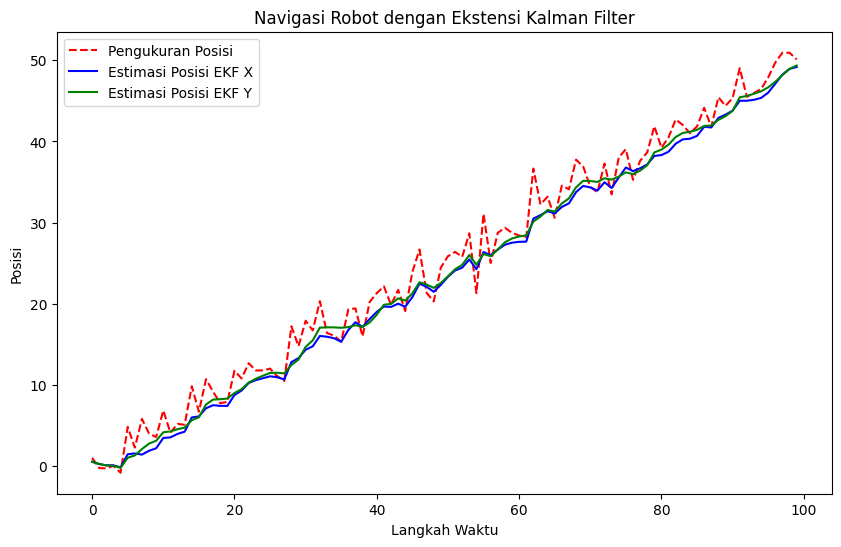

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk Ekstensi Kalman Filter
def ekf_navigation(z, x_est_prev, P_prev, A, H, Q, R):
    # Prediksi langkah
    x_pred = A @ x_est_prev
    P_pred = A @ P_prev @ A.T + Q

    # Menghitung Jacobian dari fungsi pengukuran
    H_jacobian = np.array([[1, 0, -x_pred[1] * np.sin(x_pred[2])],
                           [0, 1, x_pred[0] * np.cos(x_pred[2])]])

    # Menghitung Kalman gain
    K = P_pred @ H_jacobian.T @ np.linalg.inv(H_jacobian @ P_pred @ H_jacobian.T + R)

    # Koreksi langkah
    y = z - H @ x_pred  # Inovasi
    x_est = x_pred + K @ y
    P_est = (np.eye(len(P_pred)) - K @ H_jacobian) @ P_pred

    return x_est, P_est

# Inisialisasi variabel
dt = 0.1  # Interval waktu
A = np.array([[1, 0, -dt], [0, 1, dt], [0, 0, 1]])  # Matriks Transisi
H = np.array([[1, 0, 0], [0, 1, 0]])  # Matriks Pengukuran
Q = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])  # Noise Proses
R = np.array([[1, 0], [0, 1]])  # Noise Pengukuran

# Posisi awal dan ketidakpastian
x_est = np.array([0, 0, 0])  # [x, y, theta]
P = np.eye(3)  # Matriks ketidakpastian awal

# Simulasi pengukuran dan estimasi posisi
num_steps = 100
z = np.linspace(0, 50, num_steps) + np.random.normal(0, 2, num_steps)  # Pengukuran posisi dengan noise
estimated_positions = []

for i in range(num_steps):
    x_est, P = ekf_navigation(z[i], x_est, P, A, H, Q, R)
    estimated_positions.append(x_est[:2])  # Ambil posisi x dan y

# Visualisasi hasil
estimated_positions = np.array(estimated_positions)
plt.figure(figsize=(10, 6))
plt.plot(z, label="Pengukuran Posisi", color="r", linestyle="--")
plt.plot(estimated_positions[:, 0], label="Estimasi Posisi EKF X", color="b")
plt.plot(estimated_positions[:, 1], label="Estimasi Posisi EKF Y", color="g")
plt.xlabel('Langkah Waktu')
plt.ylabel('Posisi')
plt.title('Navigasi Robot dengan Ekstensi Kalman Filter')
plt.legend()
plt.show()


#  **Implementasi Particle Filter untuk Navigasi**

Particle Filter (PF) adalah teknik yang menggunakan sekumpulan partikel untuk mendekati distribusi kemungkinan posisi robot. Setiap partikel mewakili kemungkinan posisi dan orientasi robot, yang kemudian diperbarui berdasarkan model gerakan dan pengukuran sensor.

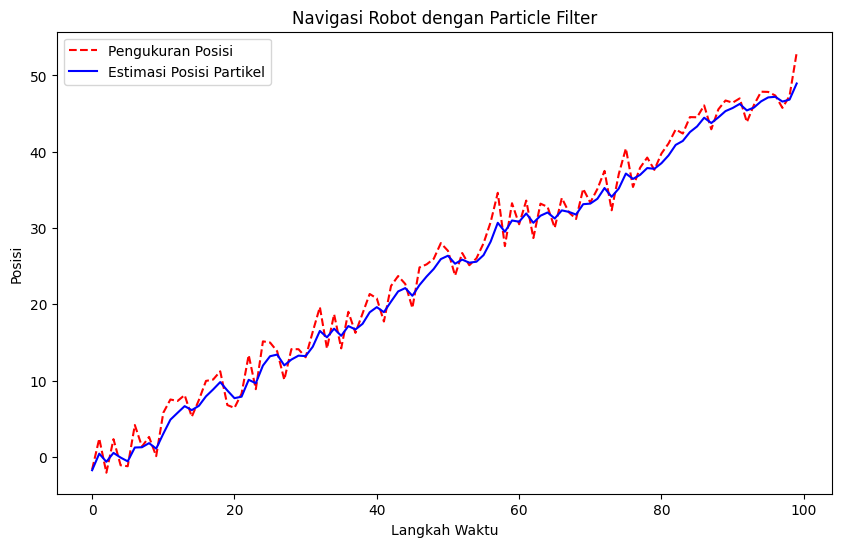

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk Filter Partikel
def particle_filter(z, particles, weights, motion_noise, sensor_noise):
    # Prediksi langkah (gerakan robot)
    particles += np.random.normal(0, motion_noise, size=particles.shape)

    # Update bobot berdasarkan pengukuran
    distances = np.abs(particles - z)
    weights = np.exp(-distances**2 / (2 * sensor_noise**2))
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling partikel
    indices = np.random.choice(range(len(particles)), size=len(particles), p=weights)
    particles = particles[indices]

    return particles, weights

# Inisialisasi variabel
num_particles = 1000
particles = np.random.uniform(-10, 10, num_particles)  # Posisi partikel acak
weights = np.ones(num_particles) / num_particles  # Bobot awal
motion_noise = 1.0  # Noise gerakan
sensor_noise = 2.0  # Noise sensor

# Simulasi pengukuran dan estimasi posisi
num_steps = 100
z = np.linspace(0, 50, num_steps) + np.random.normal(0, 2, num_steps)  # Pengukuran posisi dengan noise
estimated_positions = []

for i in range(num_steps):
    particles, weights = particle_filter(z[i], particles, weights, motion_noise, sensor_noise)
    estimated_positions.append(np.mean(particles))

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(z, label="Pengukuran Posisi", color="r", linestyle="--")
plt.plot(estimated_positions, label="Estimasi Posisi Partikel", color="b")
plt.xlabel('Langkah Waktu')
plt.ylabel('Posisi')
plt.title('Navigasi Robot dengan Particle Filter')
plt.legend()
plt.show()
